In [46]:
import os
ENV_LD_LIBRARY_PATH = ["/usr/lib/nvidia", os.environ.get("HOME") + "/.mujoco/mujoco210/bin", os.environ.get("LD_LIBRARY_PATH", "")]
os.environ["LD_LIBRARY_PATH"] = ":".join(ENV_LD_LIBRARY_PATH)
print(os.environ["LD_LIBRARY_PATH"])
# TODO: Move this stuff into .env or use some other method of setting the path

/usr/lib/nvidia:/home/i53/bodynek/.mujoco/mujoco210/bin:/usr/lib/nvidia:/home/i53/bodynek/.mujoco/mujoco210/bin:/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/cv2/../../lib64:/usr/lib/nvidia:/home/i53/bodynek/.mujoco/mujoco210/bin:/usr/lib/nvidia:/home/i53/bodynek/.mujoco/mujoco210/bin:/usr/lib/nvidia:/home/i53/bodynek/.mujoco/mujoco210/bin:/usr/lib/nvidia:/home/i53/bodynek/.mujoco/mujoco210/bin:/usr/lib/nvidia:/home/i53/bodynek/.mujoco/mujoco210/bin:/usr/lib/nvidia:/home/i53/bodynek/.mujoco/mujoco210/bin:/home/i53/bodynek/.mujoco/mujoco210/bin:/usr/local/cuda-12.2/lib64:/usr/local/cuda-12.2/lib64:


In [70]:
import subprocess
import shutil
from pathlib import Path
import sys
import contextlib
import torch
from wrapper import utils as p_utils

device = "cuda" if torch.cuda.is_available() else "cpu"
device="cpu" # ActorCriticPolicy should be run on CPU
print(device)
cwd = Path.cwd().parent
print(cwd)
# library = root.parent / "reward-surfaces-fork"
scripts = cwd / "scripts"
runs = cwd / "runs"

env_name = "InvertedDoublePendulum-v5"
# env_name = "CartPole-v1"
agent_name = "SB3_ON"
run_suffix = "plot_num_steps_2"
run_id = "_".join([env_name, agent_name, run_suffix])

num_cores = str(7)

cpu
/home/i53/bodynek/projects/reward-surfaces


In [ ]:
# Train RL agent
script_name = "train_agent"
args = {
    "save_dir": runs / run_id / "agent",
    "agent_name": agent_name,
    "env": env_name,
    "device": device,
    "hyperparameters": '{"ALGO": "PPO", "batch_size":128, "n_timesteps":400000}',
}
kwargs = {
    "--save_freq": str(40000),
}
p_utils.execute(name=script_name, args=args, kwargs=kwargs, cwd=cwd)

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
False
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_10/agent/ppo/InvertedDoublePendulum-v5_1
Eval num_timesteps=10000, episode_reward=84.66 +/- 30.65
Episode length: 10.30 +/- 3.29
New best mean reward!
Eval num_timesteps=20000, episode_reward=85.18 +/- 29.19
Episode length: 10.36 +/- 3.15
New best mean reward!
Eval num_timesteps=30000, episode_reward=92.14 +/- 28.86
Episode length: 11.10 +/- 3.09
New best mean reward!
saved checkpoint 0040000
Eval num_timesteps=40000, episode_reward=103.32 +/- 48.93
Episode length: 12.32 +/- 5.29
New best mean reward!
Eval num_timesteps=50000, episode_reward=119.90 +/- 47.45
Episode length: 14.14 +/- 5.13
New best mean reward!
Eval num_timesteps=60000, episode_reward=141.62 +/- 61.95
Episode length: 16.50 +/- 6.69
New best mean reward!
Eval num_timesteps=70000, episode_r

In [63]:
# Define plane jobs
script_name = "generate_plane_jobs"
args = {
    "agent_dir": runs / run_id / "agent" / "best",
    "out_dir": runs / run_id / "surface",
}
kwargs = {
    "--grid-size": str(31),  # str(31)
    "--magnitude": str(1.0),
    "--num-steps": str(2),  # str(200000)
    "--device": device,
}
# shutil.rmtree(runs / run_id / "surface", ignore_errors=True)
p_utils.execute(name=script_name, args=args, kwargs=kwargs, cwd=cwd)

# Evaluate plane directions
script_name = "run_jobs_multiproc"
args = {
    "job_dir": runs / run_id / "surface" / "jobs.sh",
}
kwargs = {"--num-cpus": num_cores}
p_utils.execute(name=script_name, args=args, kwargs=kwargs, cwd=cwd)

# Copy surface results to csv
script_name = "job_results_to_csv"
args = {
    "out_dir": runs / run_id / "surface",
}
kwargs = {}
p_utils.execute(name=script_name, args=args, kwargs=kwargs, cwd=cwd)
# 6:40 --> 34 tasks (200000 steps)

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_769


  0%|          | 0/961 [00:00<?, ?it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_c

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_c

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


  5%|▌         | 51/961 [00:28<07:38,  1.99it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_785
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_785
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_785
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_786
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_786
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_789
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_789
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_789
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_790
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_790
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Number of episodes: 1
dumping results


  7%|▋         | 68/961 [00:36<04:43,  3.15it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_793
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_793
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_793
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_794
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_794
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Number of episodes: 1
dumping results


  8%|▊         | 75/961 [00:40<05:23,  2.74it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_797
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_797
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_798
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_799
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_799


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


  9%|▊         | 82/961 [00:45<05:44,  2.55it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_802
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_802
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_802
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_803
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_804
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
  9%|▉         | 89/961 [00:49<04:58,  2.92it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_807
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_808
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_808
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_809
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_809
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 10%|▉         | 96/961 [00:53<04:15,  3.39it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_812
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_813
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_813


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Number of episodes: 1
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_814
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_815
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 11%|█         | 103/961 [00:57<04:41,  3.05it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_818
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_819
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_820
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_820
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_823
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_824


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_825
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_825
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_825
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_828
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_829
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_829
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_830
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_830
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 13%|█▎        | 122/961 [01:09<06:30,  2.15it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpucpu
cpu

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_832
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_833
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_834
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_834
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_834
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_835
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_838
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_839
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_839
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_840
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_839
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_843
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_844
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_844
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_845
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_845
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


 15%|█▍        | 140/961 [01:20<08:38,  1.58it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/li

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_848
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 15%|█▌        | 147/961 [01:24<08:25,  1.61it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_849
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_849
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_850
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_850
Number of episodes: 1
Number of episodes: 1
dumping results
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_852
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_853


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results


 16%|█▌        | 154/961 [01:27<08:15,  1.63it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_854
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_855
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_855
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_855
Number of episodes: 1
dumping results
Number of episodes: 1
Number of episodes: 1
dumping results
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_c

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_857
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_858
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 17%|█▋        | 161/961 [01:31<08:45,  1.52it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_859
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_860
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_860
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_860
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_86

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_862
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 17%|█▋        | 168/961 [01:35<08:37,  1.53it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_863
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_864
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_865
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_866
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_866
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_867
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_868
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 18%|█▊        | 175/961 [01:39<08:23,  1.56it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_869
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_870
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_871
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_871
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_871
Number of episodes: 1
Number of episodes: 1
dumping results
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 18%|█▊        | 176/961 [01:39<08:00,  1.63it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/li

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_872
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu
cpucpu

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_873
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_874


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 19%|█▉        | 182/961 [01:43<08:10,  1.59it/s]

Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 19%|█▉        | 183/961 [01:43<07:49,  1.66it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/li

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_875
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_876
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_876
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_876
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


 19%|█▉        | 186/961 [01:44<05:24,  2.39it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_877
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_878
cpu
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 20%|█▉        | 189/961 [01:46<07:57,  1.62it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_879
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 20%|█▉        | 190/961 [01:47<07:38,  1.68it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_880
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_880
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_880
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_881
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_882
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_883
cpu
cpu
Number of episodes: 1
dumping results
cpu
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_884
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 20%|██        | 197/961 [01:51<08:16,  1.54it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_885
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_885
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_886
Number of episodes: 1
dumping results
Number of episodes: 1
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_887
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 21%|██        | 198/961 [01:51<07:25,  1.71it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/li

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_888
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_889
Number of episodes: 1
dumping results
cpu
cpu
cpu


 21%|██        | 203/961 [01:54<07:37,  1.66it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_890
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 21%|██▏       | 205/961 [01:55<06:30,  1.94it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_891
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_892
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_892
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_893
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


 22%|██▏       | 207/961 [01:56<05:54,  2.13it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_894
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_895


 22%|██▏       | 210/961 [01:58<07:22,  1.70it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_896
cpu
Number of episodes: 1
dumping results
cpu
cpu


 22%|██▏       | 212/961 [01:59<06:13,  2.00it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_897
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_898
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_898
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_898
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_899
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_900


 23%|██▎       | 217/961 [02:02<07:11,  1.72it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_901
Number of episodes: 1
dumping results
cpu
cpu
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 23%|██▎       | 218/961 [02:02<07:43,  1.60it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_902
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_903
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_903
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_903
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_904
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 23%|██▎       | 224/961 [02:05<06:54,  1.78it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_905
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_905
Number of episodes: 1
Number of episodes: 1
dumping results
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_906
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 23%|██▎       | 225/961 [02:06<07:39,  1.60it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_907
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_907
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_907
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 24%|██▎       | 228/961 [02:07<06:14,  1.96it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_908
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 24%|██▍       | 231/961 [02:09<06:42,  1.81it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_909
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_909
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_910
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 24%|██▍       | 232/961 [02:10<07:28,  1.63it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_911
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_911
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_912
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 24%|██▍       | 235/961 [02:11<06:08,  1.97it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_913
cpu
cpu
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 25%|██▍       | 238/961 [02:13<06:37,  1.82it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_914
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_914
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_915
Number of episodes: 1
dumping results


 25%|██▍       | 239/961 [02:14<07:22,  1.63it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_916
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_916
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_917
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 25%|██▌       | 243/961 [02:15<05:00,  2.39it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_918
cpu
cpu
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 25%|██▌       | 245/961 [02:17<06:57,  1.71it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_919
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_919
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_920
Number of episodes: 1
dumping results


 26%|██▌       | 246/961 [02:18<08:01,  1.49it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_921
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_922
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_922
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 26%|██▌       | 248/961 [02:18<06:19,  1.88it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/li

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 26%|██▌       | 250/961 [02:19<05:14,  2.26it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_923
Number of episodes: 1
dumping results
cpu
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 26%|██▌       | 252/961 [02:21<06:55,  1.71it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_924
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_924
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu
cpu


 26%|██▋       | 253/961 [02:22<08:00,  1.47it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 26%|██▋       | 254/961 [02:22<06:21,  1.86it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_925
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_926
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_927
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_927
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


 27%|██▋       | 255/961 [02:22<06:13,  1.89it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/li

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 27%|██▋       | 257/961 [02:23<05:12,  2.25it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_928
Number of episodes: 1
dumping results
cpu
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 27%|██▋       | 259/961 [02:25<06:46,  1.73it/s]

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_929
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_930
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu
cpu


 27%|██▋       | 260/961 [02:26<07:57,  1.47it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 27%|██▋       | 261/961 [02:26<06:12,  1.88it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_931
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_932
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_933
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_933
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


 27%|██▋       | 262/961 [02:26<06:24,  1.82it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/li

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 28%|██▊       | 265/961 [02:27<04:05,  2.83it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_934
cpu
Number of episodes: 1
dumping results
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 28%|██▊       | 266/961 [02:29<07:16,  1.59it/s]

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_935
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_936
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_937
Number of episodes: 1
dumping results


 28%|██▊       | 268/961 [02:30<06:13,  1.86it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 28%|██▊       | 269/961 [02:30<06:24,  1.80it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/body

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_938
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_939
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_940
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 28%|██▊       | 272/961 [02:31<04:01,  2.85it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_941
cpu
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 28%|██▊       | 273/961 [02:32<07:33,  1.52it/s]

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_942
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_943
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu


 29%|██▊       | 275/961 [02:33<06:13,  1.84it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_944
Number of episodes: 1
dumping results


 29%|██▊       | 276/961 [02:34<06:24,  1.78it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_945
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_946
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_947


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 29%|██▉       | 278/961 [02:35<05:23,  2.11it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_948
Number of episodes: 1
dumping results
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 29%|██▉       | 280/961 [02:36<06:33,  1.73it/s]

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_949
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_950
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_951
Number of episodes: 1
dumping results


 29%|██▉       | 281/961 [02:37<07:27,  1.52it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 29%|██▉       | 283/961 [02:38<05:58,  1.89it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_952
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_953
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_953
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 30%|██▉       | 285/961 [02:39<05:24,  2.08it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_954
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 30%|██▉       | 287/961 [02:40<06:15,  1.79it/s]

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_955
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_956


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 30%|██▉       | 288/961 [02:41<07:11,  1.56it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_957
cpu
cpu
Number of episodes: 1
dumping results


 30%|███       | 290/961 [02:42<06:01,  1.86it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_958
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_959
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_959
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

cpu


 30%|███       | 292/961 [02:43<05:25,  2.06it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_960
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 31%|███       | 294/961 [02:44<05:58,  1.86it/s]

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_961
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_962
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 31%|███       | 295/961 [02:45<06:59,  1.59it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_963
cpu
Number of episodes: 1
dumping results
cpu


 31%|███       | 297/961 [02:46<05:54,  1.88it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_964
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_965
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_966
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

cpu


 31%|███       | 300/961 [02:47<04:19,  2.54it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_967
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 31%|███▏      | 301/961 [02:48<06:11,  1.78it/s]

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_968
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_969
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 31%|███▏      | 302/961 [02:49<07:24,  1.48it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 32%|███▏      | 303/961 [02:49<06:00,  1.82it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_970
cpu
cpu
Number of episodes: 1
dumping results
cpu


 32%|███▏      | 304/961 [02:50<05:51,  1.87it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_971
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_972
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_973


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Number of episodes: 1
dumping results
cpu


 32%|███▏      | 307/961 [02:51<04:12,  2.59it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_974
cpu
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 32%|███▏      | 308/961 [02:52<06:29,  1.68it/s]

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_975
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_976
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 32%|███▏      | 309/961 [02:53<07:46,  1.40it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 32%|███▏      | 310/961 [02:53<06:06,  1.78it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_977
Number of episodes: 1
dumping results
cpu
cpu
cpu


 32%|███▏      | 311/961 [02:54<05:53,  1.84it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_978
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_979
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_980
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu


 33%|███▎      | 314/961 [02:55<04:09,  2.59it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_981
Number of episodes: 1
dumping results
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 33%|███▎      | 315/961 [02:56<06:08,  1.75it/s]

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_982
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_983


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 33%|███▎      | 316/961 [02:57<07:31,  1.43it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 33%|███▎      | 317/961 [02:57<05:54,  1.82it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_984
cpu
Number of episodes: 1
dumping results
cpu
cpu


 33%|███▎      | 318/961 [02:58<06:03,  1.77it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_985
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_986


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_987
Number of episodes: 1
dumping results
cpu


 33%|███▎      | 321/961 [02:59<04:11,  2.55it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_988
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 34%|███▎      | 322/961 [03:00<05:48,  1.83it/s]

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_989
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_990
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 34%|███▎      | 323/961 [03:01<07:17,  1.46it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_991
Number of episodes: 1
dumping results
cpu
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 34%|███▎      | 324/961 [03:01<06:03,  1.75it/s]

cpu


 34%|███▍      | 325/961 [03:02<05:49,  1.82it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_992
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_993
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_994
cpu
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 34%|███▍      | 327/961 [03:03<05:42,  1.85it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_995
Number of episodes: 1
dumping results
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 34%|███▍      | 329/961 [03:04<05:15,  2.01it/s]

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_996
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_997
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 34%|███▍      | 330/961 [03:05<06:48,  1.54it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_998
Number of episodes: 1
dumping results
cpu


 34%|███▍      | 331/961 [03:05<06:07,  1.71it/s]

cpu
cpu


 35%|███▍      | 332/961 [03:06<05:35,  1.87it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_999
Number of episodes: 1
dumping results
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1000


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1000
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 35%|███▍      | 334/961 [03:07<05:34,  1.87it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1001


 35%|███▍      | 335/961 [03:07<04:16,  2.44it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 35%|███▍      | 336/961 [03:08<05:09,  2.02it/s]

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1002
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1003
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 35%|███▌      | 337/961 [03:09<06:41,  1.55it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1004
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 35%|███▌      | 338/961 [03:09<06:14,  1.66it/s]

cpu
cpu


 35%|███▌      | 339/961 [03:10<05:36,  1.85it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1005
Number of episodes: 1
dumping results
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1006
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1007
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 35%|███▌      | 341/961 [03:11<05:45,  1.80it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1008
Number of episodes: 1
dumping results
cpu


 36%|███▌      | 342/961 [03:11<04:20,  2.38it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 36%|███▌      | 343/961 [03:12<04:53,  2.11it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1009
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1010
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 36%|███▌      | 344/961 [03:13<06:48,  1.51it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1011
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu


 36%|███▌      | 345/961 [03:13<06:36,  1.55it/s]

cpu


 36%|███▌      | 346/961 [03:14<05:32,  1.85it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1012
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1013
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1014
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 36%|███▌      | 348/961 [03:15<05:41,  1.80it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1015
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 36%|███▋      | 349/961 [03:15<04:35,  2.22it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 36%|███▋      | 350/961 [03:16<04:25,  2.30it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1016
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1017
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 37%|███▋      | 351/961 [03:17<06:45,  1.50it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1018
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 37%|███▋      | 352/961 [03:17<06:14,  1.62it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 37%|███▋      | 353/961 [03:18<05:16,  1.92it/s]

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1019
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1020
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1021
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 37%|███▋      | 354/961 [03:19<07:20,  1.38it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 37%|███▋      | 355/961 [03:19<05:44,  1.76it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1022
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 37%|███▋      | 357/961 [03:19<04:07,  2.44it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1023
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1024
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 37%|███▋      | 358/961 [03:21<06:48,  1.48it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1025
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 37%|███▋      | 360/961 [03:21<04:58,  2.01it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1026
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1027
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1028


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1029
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 38%|███▊      | 361/961 [03:23<07:23,  1.35it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 38%|███▊      | 362/961 [03:23<05:45,  1.73it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 38%|███▊      | 364/961 [03:23<04:07,  2.41it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1030
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1031
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1032


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 38%|███▊      | 365/961 [03:25<06:45,  1.47it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 38%|███▊      | 367/961 [03:25<04:38,  2.13it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1033
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1034
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1035
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1036
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results


 38%|███▊      | 368/961 [03:27<07:24,  1.34it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 39%|███▊      | 370/961 [03:27<04:31,  2.17it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 39%|███▊      | 371/961 [03:27<04:03,  2.43it/s]

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1037
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1038
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1039
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 39%|███▊      | 372/961 [03:29<06:22,  1.54it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 39%|███▉      | 374/961 [03:29<04:26,  2.21it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1040
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1041
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1042


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1043


 39%|███▉      | 375/961 [03:31<07:29,  1.30it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
cpu


 39%|███▉      | 376/961 [03:31<06:07,  1.59it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 39%|███▉      | 378/961 [03:31<03:59,  2.43it/s]

cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1044
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1045
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1046
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 39%|███▉      | 379/961 [03:33<06:17,  1.54it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 40%|███▉      | 381/961 [03:33<04:24,  2.20it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1047
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1048
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1049
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1050
Number of episodes: 1
dumping results


 40%|███▉      | 382/961 [03:35<07:27,  1.30it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 40%|███▉      | 383/961 [03:35<06:04,  1.59it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 40%|████      | 385/961 [03:36<03:57,  2.42it/s]

cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1051
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1052
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1053
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 40%|████      | 386/961 [03:37<05:56,  1.61it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 40%|████      | 388/961 [03:37<04:11,  2.28it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1054
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1055
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1056
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1057
Number of episodes: 1
dumping results
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 40%|████      | 389/961 [03:39<07:47,  1.22it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 41%|████      | 392/961 [03:40<03:51,  2.46it/s]

cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1058
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1059
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1060
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 41%|████      | 393/961 [03:41<05:32,  1.71it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 41%|████      | 395/961 [03:41<04:10,  2.26it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1061
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1062
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1063
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1064
cpu
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 41%|████      | 396/961 [03:43<07:43,  1.22it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 41%|████▏     | 398/961 [03:43<04:38,  2.02it/s]

cpu
cpu


 42%|████▏     | 399/961 [03:44<03:48,  2.46it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1065
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1066
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1067
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 42%|████▏     | 400/961 [03:45<05:28,  1.71it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 42%|████▏     | 402/961 [03:45<04:07,  2.26it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1068
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1069
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1070
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1071
Number of episodes: 1
dumping results
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 42%|████▏     | 403/961 [03:47<07:37,  1.22it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 42%|████▏     | 406/961 [03:48<03:53,  2.38it/s]

cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1072
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1073
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1074
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 42%|████▏     | 407/961 [03:49<05:12,  1.77it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 43%|████▎     | 409/961 [03:49<04:05,  2.25it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpucpu

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1075
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1076
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1076
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1077
Number of episodes: 1
dumping results
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 43%|████▎     | 410/961 [03:51<07:19,  1.25it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 43%|████▎     | 411/961 [03:51<06:16,  1.46it/s]

cpu
cpu


 43%|████▎     | 413/961 [03:52<03:51,  2.37it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1078
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1079
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1080
Number of episodes: 1
dumping results


 43%|████▎     | 414/961 [03:52<04:54,  1.86it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 43%|████▎     | 416/961 [03:53<04:06,  2.21it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1081
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1082
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1082
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1083


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 43%|████▎     | 417/961 [03:55<07:29,  1.21it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 44%|████▎     | 420/961 [03:56<03:43,  2.43it/s]

cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1084
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 44%|████▍     | 421/961 [03:56<04:46,  1.88it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/li

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1085
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1086
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 44%|████▍     | 423/961 [03:57<04:00,  2.24it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1087
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1088
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1088
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1089
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
cpu
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 44%|████▍     | 425/961 [04:00<06:32,  1.37it/s]

cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1090
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 45%|████▍     | 428/961 [04:00<04:23,  2.02it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/li

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1091
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1092
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 45%|████▍     | 429/961 [04:01<04:57,  1.79it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1093
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1094
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1094
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1094
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 45%|████▌     | 433/961 [04:04<04:35,  1.92it/s]

cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1095
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 45%|████▌     | 435/961 [04:04<03:58,  2.21it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1096
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1096
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 45%|████▌     | 436/961 [04:05<04:49,  1.81it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1097
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1098
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1099


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1099
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 46%|████▌     | 440/961 [04:08<04:29,  1.93it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 46%|████▌     | 441/961 [04:08<03:34,  2.42it/s]

cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1100
Number of episodes: 1
dumping results


 46%|████▌     | 442/961 [04:08<03:59,  2.16it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1101
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1101
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 46%|████▌     | 443/961 [04:09<05:01,  1.72it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1102
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1103
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1104
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 46%|████▋     | 445/961 [04:11<06:13,  1.38it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/li

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1105
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1106
Number of episodes: 1
dumping results


 46%|████▋     | 446/961 [04:12<05:57,  1.44it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 47%|████▋     | 449/961 [04:12<03:57,  2.16it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1107
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1107
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 47%|████▋     | 450/961 [04:13<04:51,  1.75it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1108
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1109
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1109
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 47%|████▋     | 452/961 [04:15<05:48,  1.46it/s]

Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1110
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 47%|████▋     | 453/961 [04:16<05:38,  1.50it/s]

cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1111


 47%|████▋     | 455/961 [04:16<04:04,  2.07it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results


 47%|████▋     | 456/961 [04:17<04:17,  1.96it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1112
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1112
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 48%|████▊     | 457/961 [04:17<04:51,  1.73it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 48%|████▊     | 458/961 [04:18<04:29,  1.86it/s]

cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1113
cpu
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1114
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1115
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 48%|████▊     | 459/961 [04:19<06:24,  1.30it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1116
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 48%|████▊     | 460/961 [04:20<05:47,  1.44it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1117
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 48%|████▊     | 462/961 [04:20<03:57,  2.10it/s]

cpu


 48%|████▊     | 463/961 [04:21<04:00,  2.07it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1118
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1119
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 48%|████▊     | 464/961 [04:21<04:40,  1.77it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 48%|████▊     | 465/961 [04:22<04:17,  1.92it/s]

cpucpu

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1120
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1121
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1121
Number of episodes: 1


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 48%|████▊     | 466/961 [04:23<06:17,  1.31it/s]

dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1122
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1123
Number of episodes: 1
dumping results


 49%|████▊     | 467/961 [04:24<05:54,  1.39it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 49%|████▉     | 469/961 [04:24<03:48,  2.15it/s]

cpu


 49%|████▉     | 470/961 [04:25<03:40,  2.23it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1124
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1125
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 49%|████▉     | 471/961 [04:25<04:38,  1.76it/s]

cpu


 49%|████▉     | 472/961 [04:26<04:03,  2.01it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1126
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1127
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1127
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 49%|████▉     | 473/961 [04:27<06:18,  1.29it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1128
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1129
Number of episodes: 1
dumping results


 49%|████▉     | 474/961 [04:28<05:55,  1.37it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 49%|████▉     | 475/961 [04:28<04:26,  1.82it/s]

cpu


 50%|████▉     | 477/961 [04:29<03:29,  2.31it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1130
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1131
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 50%|████▉     | 479/961 [04:30<03:42,  2.17it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1132
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1133
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1134
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1135


 50%|████▉     | 480/961 [04:31<06:25,  1.25it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/li

Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1136


 50%|█████     | 481/961 [04:32<06:10,  1.30it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 50%|█████     | 482/961 [04:32<04:33,  1.75it/s]

cpu
Number of episodes: 1
dumping results


 50%|█████     | 484/961 [04:33<03:35,  2.22it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1137
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1138


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 51%|█████     | 486/961 [04:34<03:33,  2.22it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1139
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1140
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1141
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1142
Number of episodes: 1
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 51%|█████     | 487/961 [04:36<07:27,  1.06it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1143
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 51%|█████     | 488/961 [04:36<06:09,  1.28it/s]

Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 51%|█████     | 490/961 [04:37<03:54,  2.01it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1144
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1145
Number of episodes: 1
dumping results


 51%|█████     | 491/961 [04:37<03:40,  2.13it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 51%|█████▏    | 493/961 [04:38<03:09,  2.48it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1146
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1147
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 51%|█████▏    | 494/961 [04:40<06:52,  1.13it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1148
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1149
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 52%|█████▏    | 495/961 [04:40<05:44,  1.35it/s]

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1150
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 52%|█████▏    | 497/961 [04:41<03:40,  2.10it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1151
Number of episodes: 1
dumping results


 52%|█████▏    | 498/961 [04:41<03:16,  2.36it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1152
Number of episodes: 1
dumping results


 52%|█████▏    | 500/961 [04:42<03:05,  2.48it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1153
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1154
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 52%|█████▏    | 501/961 [04:44<06:46,  1.13it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1155
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1156


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 52%|█████▏    | 502/961 [04:44<05:38,  1.35it/s]

Number of episodes: 1
dumping results
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1157
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 52%|█████▏    | 503/961 [04:45<05:05,  1.50it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1158
Number of episodes: 1
dumping results


 53%|█████▎    | 505/961 [04:45<03:15,  2.33it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1159
Number of episodes: 1
dumping results


 53%|█████▎    | 507/961 [04:46<03:05,  2.45it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1160
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1161
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 53%|█████▎    | 508/961 [04:48<06:21,  1.19it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1162
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1162
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 53%|█████▎    | 509/961 [04:48<05:24,  1.39it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1163
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 53%|█████▎    | 510/961 [04:49<05:08,  1.46it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1164
Number of episodes: 1
dumping results


 53%|█████▎    | 512/961 [04:49<03:19,  2.25it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1165
Number of episodes: 1
dumping results


 53%|█████▎    | 513/961 [04:49<03:14,  2.30it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 53%|█████▎    | 514/961 [04:50<03:10,  2.35it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1166
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Number of episodes: 1
dumping results
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1167
cpu
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 54%|█████▎    | 515/961 [04:52<06:06,  1.22it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1168
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1169
cpu


 54%|█████▎    | 516/961 [04:52<05:13,  1.42it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1170
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1171
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 54%|█████▍    | 518/961 [04:53<04:34,  1.61it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1172
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 54%|█████▍    | 519/961 [04:54<03:39,  2.01it/s]

Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 54%|█████▍    | 520/961 [04:54<03:26,  2.13it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 54%|█████▍    | 521/961 [04:54<03:17,  2.23it/s]

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1173
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1174
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu


 54%|█████▍    | 523/961 [04:56<04:29,  1.63it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1175
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1176
cpu
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1177


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results


 55%|█████▍    | 524/961 [04:57<05:19,  1.37it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1178
Number of episodes: 1
dumping results


 55%|█████▍    | 526/961 [04:58<03:29,  2.07it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1179
Number of episodes: 1
dumping results


 55%|█████▍    | 527/961 [04:58<03:05,  2.34it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu


 55%|█████▍    | 528/961 [04:58<03:01,  2.38it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1180
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1181
Number of episodes: 1
dumping results
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 55%|█████▌    | 530/961 [05:00<04:06,  1.75it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1182
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1183
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1184
Number of episodes: 1
dumping results


 55%|█████▌    | 531/961 [05:01<05:14,  1.37it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1185
Number of episodes: 1
dumping results


 55%|█████▌    | 533/961 [05:02<03:22,  2.12it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1186
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 56%|█████▌    | 534/961 [05:02<03:00,  2.37it/s]

cpu
cpu


 56%|█████▌    | 535/961 [05:02<02:57,  2.41it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1187
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1188
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 56%|█████▌    | 537/961 [05:04<03:52,  1.82it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1189
Number of episodes: 1
dumping results
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1190
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1191
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1192
Number of episodes: 1
dumping results


 56%|█████▌    | 538/961 [05:05<05:27,  1.29it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 56%|█████▌    | 539/961 [05:06<04:39,  1.51it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1193
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 56%|█████▋    | 541/961 [05:06<02:59,  2.34it/s]

cpu
cpu


 56%|█████▋    | 542/961 [05:06<02:56,  2.38it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1194
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1195


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 57%|█████▋    | 544/961 [05:08<03:45,  1.85it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1196
Number of episodes: 1
dumping results
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1197
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1197
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1198
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 57%|█████▋    | 545/961 [05:09<05:25,  1.28it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1199
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 57%|█████▋    | 546/961 [05:10<04:39,  1.49it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 57%|█████▋    | 548/961 [05:10<02:51,  2.41it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu


 57%|█████▋    | 549/961 [05:10<02:49,  2.43it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1200
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1201
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 57%|█████▋    | 551/961 [05:12<03:38,  1.87it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1202
cpu
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1203
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1203
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1204
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 57%|█████▋    | 552/961 [05:14<05:39,  1.20it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1205
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 58%|█████▊    | 553/961 [05:14<04:25,  1.54it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 58%|█████▊    | 555/961 [05:14<02:33,  2.65it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu


 58%|█████▊    | 556/961 [05:14<02:35,  2.60it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1206
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1207


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 58%|█████▊    | 558/961 [05:16<03:36,  1.86it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1208
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1209
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1210
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1211
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results


 58%|█████▊    | 559/961 [05:18<05:55,  1.13it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1212
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 58%|█████▊    | 561/961 [05:18<03:22,  1.97it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 58%|█████▊    | 562/961 [05:18<02:33,  2.59it/s]

cpu
cpu


 59%|█████▊    | 563/961 [05:18<02:23,  2.78it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1213
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1214
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 59%|█████▉    | 565/961 [05:20<03:20,  1.97it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1215
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1216
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1217
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1218
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 59%|█████▉    | 566/961 [05:22<05:41,  1.16it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/li

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1219
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 59%|█████▉    | 568/961 [05:22<03:23,  1.93it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 59%|█████▉    | 569/961 [05:22<02:33,  2.55it/s]

cpu
cpu


 59%|█████▉    | 570/961 [05:23<02:22,  2.74it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1220
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1221
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 59%|█████▉    | 571/961 [05:24<04:35,  1.42it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1222
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1223
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1224
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1225
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 60%|█████▉    | 573/961 [05:26<05:09,  1.25it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1226
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 60%|█████▉    | 576/961 [05:26<02:37,  2.45it/s]

cpucpu



 60%|██████    | 577/961 [05:27<02:25,  2.64it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1227
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1227
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 60%|██████    | 579/961 [05:28<03:13,  1.98it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1228
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1229
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1229
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1230


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Number of episodes: 1
dumping results


 60%|██████    | 580/961 [05:30<05:37,  1.13it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1231
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 61%|██████    | 583/961 [05:30<02:41,  2.35it/s]

cpu
cpu


 61%|██████    | 584/961 [05:31<02:29,  2.53it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1232
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1233
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 61%|██████    | 586/961 [05:32<03:05,  2.02it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1234
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1235
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1236
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1237
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1238
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 61%|██████▏   | 590/961 [05:35<02:43,  2.27it/s]

cpu


 61%|██████▏   | 591/961 [05:35<02:21,  2.61it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1239
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1240
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 62%|██████▏   | 592/961 [05:36<03:38,  1.69it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 62%|██████▏   | 593/961 [05:36<03:00,  2.04it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1241
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1242
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1242
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1243


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 62%|██████▏   | 594/961 [05:38<05:13,  1.17it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/li

Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1244
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 62%|██████▏   | 597/961 [05:39<02:45,  2.20it/s]

cpu


 62%|██████▏   | 598/961 [05:39<02:13,  2.71it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1245
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1246
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 62%|██████▏   | 599/961 [05:40<03:31,  1.72it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 62%|██████▏   | 600/961 [05:40<03:03,  1.97it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1247
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1248
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1248
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1249
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1250
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 63%|██████▎   | 601/961 [05:42<05:01,  1.19it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/li

Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 63%|██████▎   | 603/961 [05:43<03:26,  1.73it/s]

cpu


 63%|██████▎   | 604/961 [05:43<02:36,  2.28it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1251
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1252
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 63%|██████▎   | 607/961 [05:44<02:40,  2.21it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1253
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1254
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1255
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1256
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1256


 63%|██████▎   | 608/961 [05:46<04:34,  1.29it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu


 63%|██████▎   | 610/961 [05:47<03:31,  1.66it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1257
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1258


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 64%|██████▍   | 614/961 [05:48<02:30,  2.31it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1259
cpu
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 64%|██████▍   | 615/961 [05:50<04:01,  1.43it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1260
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1261
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1261
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1262
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

cpu
cpu


 64%|██████▍   | 617/961 [05:51<03:31,  1.63it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1263
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1264


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 65%|██████▍   | 621/961 [05:52<02:25,  2.33it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1265
Number of episodes: 1
dumping results
cpu
cpu
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 65%|██████▍   | 622/961 [05:54<03:53,  1.45it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1266
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1267
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1267
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1267
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

cpu


 65%|██████▌   | 625/961 [05:55<02:43,  2.06it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1268
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1269


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 65%|██████▌   | 628/961 [05:56<02:15,  2.46it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1270
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu
cpu


 65%|██████▌   | 629/961 [05:58<03:55,  1.41it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1271
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1272
cpu
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1273
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1274


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
cpu


 66%|██████▌   | 632/961 [05:59<02:43,  2.01it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1275
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1276
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 66%|██████▌   | 635/961 [06:00<02:10,  2.50it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1277
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu
cpu


 66%|██████▌   | 636/961 [06:02<03:50,  1.41it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1278
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1279
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1280
Number of episodes: 1
dumping results
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1280
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1281
Number of episodes: 1
dumping results


 66%|██████▋   | 638/961 [06:03<03:48,  1.41it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1282
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 67%|██████▋   | 642/961 [06:04<02:07,  2.50it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1283
cpu
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu


 67%|██████▋   | 643/961 [06:06<03:33,  1.49it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1284
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1285
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1286
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1286
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Number of episodes: 1
dumping results


 67%|██████▋   | 645/961 [06:07<03:37,  1.45it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1287
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1288
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 68%|██████▊   | 649/961 [06:08<01:58,  2.64it/s]

cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1289
Number of episodes: 1
dumping results
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu


 68%|██████▊   | 650/961 [06:10<03:22,  1.54it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1290
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1291
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1292
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1292
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1293
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1294
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 68%|██████▊   | 655/961 [06:12<02:18,  2.21it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1295
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 68%|██████▊   | 657/961 [06:14<02:57,  1.71it/s]

cpu
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1296
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1297
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1298


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1298
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


 69%|██████▊   | 660/961 [06:16<02:37,  1.91it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1299
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1299
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 69%|██████▉   | 663/961 [06:16<01:45,  2.82it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1300
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 69%|██████▉   | 664/961 [06:18<03:02,  1.63it/s]

cpu
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1301
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1302
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1303
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1303
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 69%|██████▉   | 665/961 [06:19<03:54,  1.26it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/li

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1304
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1305
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 69%|██████▉   | 666/961 [06:20<03:38,  1.35it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 69%|██████▉   | 667/961 [06:20<02:45,  1.78it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu


 70%|██████▉   | 670/961 [06:20<01:40,  2.89it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1306
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu


 70%|██████▉   | 671/961 [06:22<02:51,  1.69it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1307
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu


 70%|██████▉   | 672/961 [06:23<03:53,  1.24it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/li

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1308
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1308
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1309
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1310
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1311
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 70%|███████   | 673/961 [06:24<03:52,  1.24it/s]

cpu


 70%|███████   | 677/961 [06:24<01:51,  2.55it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1312
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu


 71%|███████   | 678/961 [06:26<02:36,  1.81it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1313
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu


 71%|███████   | 679/961 [06:27<03:41,  1.27it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1314
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1314
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1314
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1315
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1316
Number of episodes: 1
dumping results
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 71%|███████   | 684/961 [06:29<01:52,  2.47it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1317
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu


 71%|███████▏  | 685/961 [06:30<02:28,  1.86it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1318
cpu
cpu
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu


 71%|███████▏  | 686/961 [06:31<03:25,  1.34it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1319
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1320
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1320
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1321
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1322
Number of episodes: 1
dumping results
cpu


 72%|███████▏  | 691/961 [06:33<01:48,  2.49it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1323
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 72%|███████▏  | 692/961 [06:33<02:17,  1.95it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1324
Number of episodes: 1
dumping results
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu


 72%|███████▏  | 693/961 [06:35<03:27,  1.29it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1325
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1326
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1326
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.pyNumber of episodes: 1

dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1327
Number of episodes: 1
dumping results
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1328
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 73%|███████▎  | 698/961 [06:37<01:33,  2.80it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1329
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 73%|███████▎  | 699/961 [06:37<02:02,  2.13it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1330
Number of episodes: 1
dumping results
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu


 73%|███████▎  | 700/961 [06:39<03:20,  1.30it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1331
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1332
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1333
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1334
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1335
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 73%|███████▎  | 705/961 [06:41<01:30,  2.82it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/li

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1336
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 73%|███████▎  | 706/961 [06:41<01:53,  2.25it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1337
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu


 74%|███████▎  | 707/961 [06:43<03:11,  1.33it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1338
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1339
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1339


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1340
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1341
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 74%|███████▍  | 709/961 [06:44<02:50,  1.48it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1342
Number of episodes: 1
dumping results


 74%|███████▍  | 711/961 [06:45<01:50,  2.26it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 74%|███████▍  | 713/961 [06:45<01:40,  2.46it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1343
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu


 74%|███████▍  | 714/961 [06:47<02:44,  1.50it/s]

cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1344
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1345
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1345
cpu
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1346
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1346
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 75%|███████▍  | 717/961 [06:49<02:10,  1.87it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1347
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 75%|███████▍  | 718/961 [06:49<01:51,  2.17it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 75%|███████▍  | 720/961 [06:49<01:35,  2.51it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1348
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu


 75%|███████▌  | 721/961 [06:51<02:38,  1.51it/s]

cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1349
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1349
cpu
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1350
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1351
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1351
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 75%|███████▌  | 724/961 [06:53<02:09,  1.83it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1352
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 75%|███████▌  | 725/961 [06:53<01:50,  2.13it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 76%|███████▌  | 727/961 [06:53<01:29,  2.60it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1353
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu


 76%|███████▌  | 728/961 [06:55<02:31,  1.54it/s]

cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1354
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1355
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1356
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1357
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1358
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 76%|███████▌  | 729/961 [06:57<03:28,  1.11it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/li

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1359
Number of episodes: 1
dumping results


 76%|███████▌  | 732/961 [06:57<01:49,  2.10it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 76%|███████▋  | 734/961 [06:58<01:23,  2.71it/s]

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1360
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 76%|███████▋  | 735/961 [06:59<02:24,  1.57it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1361
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1361
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1362
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1363
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1363
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1364
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 77%|███████▋  | 736/961 [07:01<03:31,  1.07it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 77%|███████▋  | 740/961 [07:01<01:33,  2.37it/s]

cpu


 77%|███████▋  | 741/961 [07:02<01:22,  2.68it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1365
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 77%|███████▋  | 742/961 [07:03<02:20,  1.56it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1366
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1368
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1369
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 78%|███████▊  | 746/961 [07:05<01:50,  1.94it/s]

cpu


 78%|███████▊  | 748/961 [07:06<01:20,  2.65it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1370
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1371
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1373
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1374
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 78%|███████▊  | 753/961 [07:09<01:49,  1.89it/s]

cpu


 79%|███████▊  | 755/961 [07:10<01:21,  2.54it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1375
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1376
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 79%|███████▉  | 762/961 [07:14<01:21,  2.43it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1380
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1381
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1383
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu


 80%|████████  | 769/961 [07:18<01:18,  2.43it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1384
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1385
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

cpu


 81%|████████  | 774/961 [07:22<01:41,  1.83it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1388
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 81%|████████  | 777/961 [07:23<01:26,  2.12it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePe

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1393
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 82%|████████▏ | 784/961 [07:27<01:21,  2.18it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1396
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1396
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


 82%|████████▏ | 786/961 [07:30<02:14,  1.30it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 82%|████████▏ | 789/961 [07:30<01:27,  1.98it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1397
Number of episodes: 1
dumping results


 82%|████████▏ | 791/961 [07:31<01:17,  2.20it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1402
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 83%|████████▎ | 797/961 [07:34<01:16,  2.15it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1407
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 84%|████████▍ | 805/961 [07:39<01:02,  2.51it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Number of episodes: 1
dumping results
Number of episodes: 1
dumping resultsNumber of episodes: 1

dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1411
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 84%|████████▍ | 812/961 [07:43<01:04,  2.31it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpucpu

cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1413
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1413
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1413
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1413
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1413
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/ru

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpucpu

cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1416
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1416Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1416

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1416
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1416
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1416
Number of episodes: 1
dumping results
Number of episodes: 1
Number of episodes: 1
dumping resu

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpucpucpu


cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1418
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1418
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1419
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1419
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1419
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1419
Number of episodes: 1
dumping results
Number of episodes

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 86%|████████▌ | 827/961 [07:55<01:26,  1.54it/s]/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/li

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 87%|████████▋ | 834/961 [07:59<01:16,  1.67it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1421
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1421
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1421
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1422
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1422
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1422
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1423
cpu
c

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 88%|████████▊ | 841/961 [08:03<01:13,  1.63it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1424
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1424
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1424
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1425
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1425
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDou

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1426
Numbe

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu
cpu


 88%|████████▊ | 848/961 [08:07<01:09,  1.64it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1427
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1427
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1427
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1428
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1428
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDou

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1430
Number of episodes: 1
dumping results
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packag

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1431
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1431
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1431
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1431
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1432
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDou

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1434
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1435
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1438
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 90%|█████████ | 869/961 [08:19<00:53,  1.71it/s]

cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1439
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1439
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1439
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1440
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1440
Number of episodes: 1
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1440
dumping results
Number of episodes: 1
dumping re

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1441
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 91%|█████████ | 876/961 [08:22<00:46,  1.82it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1442
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


 91%|█████████▏| 877/961 [08:25<01:01,  1.37it/s]

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1444
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 92%|█████████▏| 883/961 [08:26<00:40,  1.95it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpucpu

cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1445
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu


 92%|█████████▏| 884/961 [08:29<00:55,  1.38it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1446
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 93%|█████████▎| 890/961 [08:30<00:35,  2.01it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpucpu

cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1447
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

cpu


 93%|█████████▎| 891/961 [08:33<00:50,  1.38it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1448
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 93%|█████████▎| 897/961 [08:34<00:31,  2.06it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePe

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

cpu


 93%|█████████▎| 898/961 [08:37<00:46,  1.36it/s]

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1450
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 94%|█████████▍| 904/961 [08:38<00:26,  2.14it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1452
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 95%|█████████▍| 911/961 [08:42<00:22,  2.23it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1455
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 96%|█████████▌| 918/961 [08:46<00:18,  2.36it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1460
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 96%|█████████▋| 925/961 [08:50<00:14,  2.45it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1464
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 97%|█████████▋| 932/961 [08:54<00:11,  2.62it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1468
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 97%|█████████▋| 936/961 [08:59<00:14,  1.68it/s]

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1470
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1470
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1470
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1470
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1470
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpu
cpu
cpu
cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1473
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1473
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1473
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1474
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1474
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpucpu

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1476
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1476
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1476
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1476
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1476
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
Number of episodes: 1
dumping results
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py
cpu
cpu
cpucpu

cpu
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoub

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1478
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1478
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1478
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1478
Log path: /home/i53/bodynek/projects/reward-surfaces/runs/InvertedDoublePendulum-v5_SB3_ON_plot_num_steps_2/surface/ppo/InvertedDoublePendulum-v5_1478
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results
Number of episodes: 1
dumping results


/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/numpy/_core/_methods.p

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


In [64]:
# Plot reward surface
script_name = "plot_plane"
args = {
    "in_dir": runs / run_id / "surface" / "results.csv",
}
kwargs = {
    "--outname": runs / run_id / run_id,
    "--env_name": "Cartpole",  # "CartPole-v1",
    # "--key": "episode_rewards"
    # "--type": "mesh", # ["all", "mesh", "vtp", "heat", "contour",  "contourf"]
}
p_utils.execute(name=script_name, args=args, kwargs=kwargs, cwd=cwd)

/home/i53/bodynek/.local/lib/micromamba/envs/reward-surfaces/lib/python3.12/site-packages/stable_baselines3/__init__.py


Index(['dim0', 'dim1', 'scale', 'magnitude', 'dir1_scale', 'dir2_scale',
       'episode_rewards', 'episode_std_rewards', 'episode_stderr_rewards',
       'episode_value_ests', 'episode_values', 'episode_td_err',
       'episode_avg_len', 'episode_std_avg_len', 'step_rewards',
       'step_value_ests', 'step_values', 'step_td_err', 'dim0.1', 'dim1.1'],
      dtype='object')
9327.142923968862


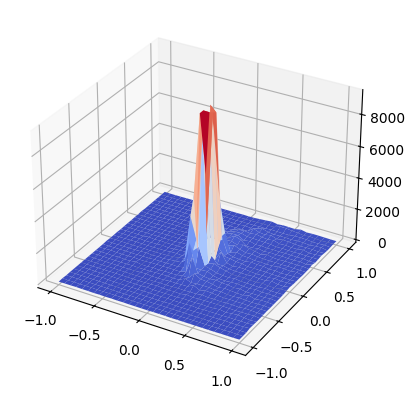

In [71]:
import pandas as pd
from reward_surfaces import plotting
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import plotly.graph_objects as go
import pickle

# plotting.plot_plane()
data = pd.read_csv(runs / run_id / "surface" / "results.csv")
data = data.sort_values(["dim0", "dim1"])
# data
print(data.columns)
x, y, z = data["dim0"], data["dim1"], data["episode_rewards"]
n = np.floor(np.sqrt(len(x))).astype(int)
# print(x.sort_values())
X = np.reshape(x[: n**2], (n, n))
Y = np.reshape(y[: n**2], (n, n))
Z = np.reshape(z[: n**2], (n, n))
print(np.max(Z))
# print(X.shape)
# print(np.sin(np.meshgrid(x, y)).shape)
# X = pickle.load(open("/home/mattis/git/sem5/reward_landscapes/test_X.pkl", "rb"))
# Y = pickle.load(open("/home/mattis/git/sem5/reward_landscapes/test_Y.pkl", "rb"))
# Z = pickle.load(open("/home/mattis/git/sem5/reward_landscapes/test_Z.pkl", "rb"))
# print(Z)
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z)])
fig.show()
# fig.show(figsize=(4,4))
# print(Z)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)